In [3]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Graph dynamics

Parts of this notebooks are based on or inspired by [Eric Ma](https://ericmjl.github.io/)'s code from his amazing course:

https://campus.datacamp.com/courses/intermediate-network-analysis-in-python/

## Create a dynamic dataset

In [23]:
senders = list(range(100))
reciepients = list(range(100))

In [30]:
# Create dates
dates = pd.date_range('2020-01-01', '2020-12-01', freq = 'd')

In [31]:
rows = []

for date in dates:
    rows.append((
        np.random.choice(senders),
        np.random.choice(reciepients),
        date.year,
        date.month,
        date.day
    ))

In [32]:
df = pd.DataFrame(rows, columns = ['sender', 'recipient', 'year', 'month', 'day'])
df.index = dates

In [33]:
df.head()

,sender,recipient,year,month,day
2020-01-01,4,80,2020,1,1
2020-01-02,40,7,2020,1,2
2020-01-03,26,66,2020,1,3
2020-01-04,17,82,2020,1,4
2020-01-05,73,84,2020,1,5


## Extract a series of monthly snapshots

In [34]:
months = df.month.unique()

In [35]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [38]:
# Initialize snapshots list
snapshots = []

for month in months:
    
    # Create a blank graph
    G = nx.Graph()
    
    # Get all nodes
    G.add_nodes_from(df.sender)      # NOTE: Assuming that nodes are constant over time!!!
    G.add_nodes_from(df.recipient)   # In this example `sender` and `recipient` will be most likely the same,
                                     # but it doesn't have to be the case in other cases
    
    # Filter a monthly snapshot
    df_monthly = df[df.month == month]
    
    # Add edges that existed in a given month to the graph
    G.add_edges_from(zip(df_monthly.sender, df_monthly.recipient))
    
    # Add a snapshot graph to the snapshots list
    snapshots.append(G)

## Analyze edge changes over time

In [40]:
edges_added   = []
edges_removed = []
pct_changes   = []

window_size = 1       

for i in range(len(snapshots) - window_size):
    
    # Get snapshots
    snapshot_t1 = snapshots[i]
    snapshot_t2 = snapshots[i + window_size]
        
    # Save edge differences (note that `nx.difference()` is non-symmetric)
    edges_added.append(nx.difference(snapshot_t2, snapshot_t1))   
    edges_removed.append(nx.difference(snapshot_t1, snapshot_t2))
    
    # Store pct change in number of edges
    pct_change = (len(snapshot_t2.edges()) - len(snapshot_t1.edges())) / len(snapshot_t1.edges())
    pct_changes.append(pct_change)

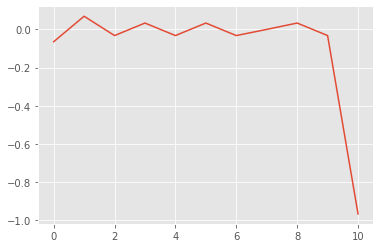

In [42]:
# Plot pct_changes
plt.plot(pct_changes)
plt.show()

As our graph is random we do not expect any significant changes. A severe drop in the last month is caused by the fact that we only have data for one day in the last month, so - in fact - the comparison is not fair. 